## Final Project Submission

Please fill out:
* Student name:  Deon Durrant
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: Mark Bardour
* Blog post URL:



# Project Overview

This project investigates movie data sourced from Box Office Mojo (BOM) and the Internet Movie Database (IMDB) for the years 2010 to 2018. The aim is to offer insights to GAT INC, assisting in their decision-making process regarding potential expansion into the movie production industry.

The analysis encompasses fundamental market metrics and extends to additional metrics beyond the project's scope, providing a comprehensive view of the industry landscape.

# Business Challenge

GAT INC aims to diversify its portfolio as a movie studio by aligning movie audience preferences with different market segments.

The focus lies in identifying movie genres, assessing movie durations, and understanding their roles as predictors of sales. Through market segmentation and the exploration of the relationships between these variables, the study aims to provide valuable insights. Trends and patterns related to movie genres, ratings, movie durations, domestic and foreign sales, and global sales are analyzed.

# Data Understanding 

Understanding the data involves consolidating information from two distinct movie databases covering the years 2010 to 2018. The dataset originates from two separate sources: a SQL database and a CSV file. Prior to merging, thorough preprocessing and cleaning procedures are applied. Additionally, feature engineering techniques are utilized to establish a new market segment. To support initial insights and enhance visualization capabilities, categorical variable is encoded.

# Exploratory Data Analysis
During the exploratory data analysis phase, I will investigate patterns, variations, and other characteristics relevant to the business inquiries. Simultaneously, I will scrutinize the data for irregularities and recognize any constraints it may have.

Begin by importing the data and converting it into a pandas dataframe.

In [1]:
#Import relevant libraires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm


# Importing the databases
Data from IMDB is located in a SQLite database will be imported first.

Data from the Box office Mojo is a csv file 

In [2]:
# Importing the IMDB database
#Connect to the database
import sqlite3 
conn = sqlite3.connect('im.db')


In [3]:
#Create cursor 
cur = conn.cursor()

In [4]:
# Execute the query
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")


In [5]:
# Query data from the database using Pandas
df = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
df

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


To address the business problem tables movie_basic and movie_ratings will be used 

In [6]:
# movie_ratings
df= pd.read_sql("""SELECT* 
FROM movie_ratings
 ;""", conn)
df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [7]:
#movie basics 
df= pd.read_sql("""SELECT* 
FROM movie_basics
 ;""", conn)
df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [8]:
# Create dataframe for analysis by joining movie basics and moving ratings tables 
IMDB= pd.read_sql(""" SELECT primary_title, start_year, runtime_minutes, genres, movie_basics.movie_id AS movieID, averagerating
FROM movie_basics
LEFT JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
GROUP BY movie_basics.movie_id;
""", conn)
IMDB

,primary_title,start_year,runtime_minutes,genres,movieID,averagerating
0,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0
1,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",tt0066787,7.2
2,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9
3,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1
4,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5
...,...,...,...,...,...,...
146139,Kuambil Lagi Hatiku,2019,123.0,Drama,tt9916538,NaN
146140,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,tt9916622,NaN
146141,Dankyavar Danka,2013,NaN,Comedy,tt9916706,NaN
146142,6 Gunn,2017,116.0,None,tt9916730,NaN


In [9]:
# Close the database connection
conn.close()


# Explore and Examine IMDB data

In [10]:
# Obtain a concise summary of the overall structure of dataframe
IMDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   start_year       146144 non-null  int64  
 2   runtime_minutes  114405 non-null  float64
 3   genres           140736 non-null  object 
 4   movieID          146144 non-null  object 
 5   averagerating    73856 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 6.7+ MB


In [11]:
#Overview of the numerical features of the dataset
IMDB.isna().sum()

primary_title          0
start_year             0
runtime_minutes    31739
genres              5408
movieID                0
averagerating      72288
dtype: int64

# Summary of the overall structure of  IMDB dataframe

The data summary confirms this is a pandas dataframe. The dataframe has 146143 entries within 6 columns. Indication of missing data in 3 of the columns. Decisions regarding handling of such is taken during data cleaning.
dtypes: float64(2), int64(1), object(3) memory usage: 6.7+ MB

In [12]:
# Drop nan values
IMDB=IMDB.dropna()
# drop duplicate column
IMDB=IMDB.drop_duplicates()


In [13]:
# rename primary title as title
IMDB.rename(columns={'primary_title': 'title'}, inplace=True)
IMDB

,title,start_year,runtime_minutes,genres,movieID,averagerating
0,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0
1,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",tt0066787,7.2
2,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9
4,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5
7,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",tt0137204,8.1
...,...,...,...,...,...,...
146113,Padmavyuhathile Abhimanyu,2019,130.0,Drama,tt9911774,8.4
146114,Swarm Season,2019,86.0,Documentary,tt9913056,6.2
146115,Diabolik sono io,2019,75.0,Documentary,tt9913084,6.2
146122,Sokagin Çocuklari,2019,98.0,"Drama,Family",tt9914286,8.7


# Second database  BOM
Import csv data file from box office mojo ( bom)

In [14]:
# Import csv data
bom_movie= pd.read_csv('bom.movie_gross.csv')
bom_movie

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [15]:
# Explore and examine  data
bom_movie.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [16]:
# Numerical feature
bom_movie.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

# Summary of the overall structure of  bom_movie dataframe
The data summary confirms this is a pandas dataframe. The dataframe has 3387 entries within 5 columns Indication of missing data in 3 of the columns. Decisions regarding handling of such is taken during data cleaning. dtypes: float64(1), int64(1), object(3). 
foreign_gross is an object data type and requres a change to float.

# Data Cleaning 

In [17]:
#drop null values
bom_movie.dropna(inplace=True)
# Drop duplicate values 
bom_movie.drop_duplicates()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


# Handling inconsistent data:
Address typos, variations in capitalization, and naming conventions
## Data type conversion
1.Change foreign_gross to float dtype

In [18]:
# Remove comma and change data type from object to float 
bom_movie['foreign_gross']= bom_movie['foreign_gross'].str.replace(',', '')
bom_movie['foreign_gross']= bom_movie['foreign_gross'].astype(float)

# Merge Databases  for Analysis
To conduct a thorough analysis, I will merge the IMDB and BOM databases. This integration will enable a comprehensive examination of the data.

In [19]:
# Merge databases 
movie_db= pd.merge(IMDB, bom_movie, how='inner')
movie_db.head()

,title,start_year,runtime_minutes,genres,movieID,averagerating,studio,domestic_gross,foreign_gross,year
0,On the Road,2012,124.0,"Adventure,Drama,Romance",tt0337692,6.1,IFC,744000.0,8000000.0,2012
1,On the Road,2014,89.0,Drama,tt4339118,6.0,IFC,744000.0,8000000.0,2012
2,On the Road,2016,121.0,Drama,tt5647250,5.7,IFC,744000.0,8000000.0,2012
3,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",tt0359950,7.3,Fox,58200000.0,129900000.0,2013
4,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",tt0365907,6.5,Uni.,26300000.0,26900000.0,2014


# Explore and examine the data

Examine the data structure.


In [20]:
# Obtain a concise summary of the overall structure of dataframe
movie_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1767 entries, 0 to 1766
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1767 non-null   object 
 1   start_year       1767 non-null   int64  
 2   runtime_minutes  1767 non-null   float64
 3   genres           1767 non-null   object 
 4   movieID          1767 non-null   object 
 5   averagerating    1767 non-null   float64
 6   studio           1767 non-null   object 
 7   domestic_gross   1767 non-null   float64
 8   foreign_gross    1767 non-null   float64
 9   year             1767 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 151.9+ KB


In [21]:
#Overview of the numerical features of the dataset
movie_db.isna().sum()

title              0
start_year         0
runtime_minutes    0
genres             0
movieID            0
averagerating      0
studio             0
domestic_gross     0
foreign_gross      0
year               0
dtype: int64

# Summary of the overall structure of  movie_dataframe
The data summary confirms this is a pandas dataframe. The combined dataframe has 1767 entries within 10 columns. There is no indication of missing data. dtypes: float64(4), int64(2), object(4)
memory usage: 151.9+ KB

# To address the business inquiry and provide actionable insights:

1.  Analysis will entail movie genres as a predictor of  sales, average rating, and runtime.

2. Investigate the relationship between movie length (runtime), average rating, and sales across different market segments

3. Explore how movie length(runtime) correlates with  sales.

4. Assess geographical market segmentation, aligning with the company's areas of interest..

In [22]:
# Drop unnecessary columns
movie_db.drop(['start_year' ,'movieID', 'studio'], axis=1, inplace=True)
movie_db

,title,runtime_minutes,genres,averagerating,domestic_gross,foreign_gross,year
0,On the Road,124.0,"Adventure,Drama,Romance",6.1,744000.0,8000000.0,2012
1,On the Road,89.0,Drama,6.0,744000.0,8000000.0,2012
2,On the Road,121.0,Drama,5.7,744000.0,8000000.0,2012
3,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,58200000.0,129900000.0,2013
4,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,26300000.0,26900000.0,2014
...,...,...,...,...,...,...,...
1762,Detective Chinatown 2,121.0,"Action,Comedy,Mystery",6.1,2000000.0,542100000.0,2018
1763,Hereditary,127.0,"Drama,Horror,Mystery",7.3,44100000.0,35300000.0,2018
1764,Nobody's Fool,110.0,"Comedy,Drama,Romance",4.6,31700000.0,1800000.0,2018
1765,How Long Will I Love U,101.0,Romance,6.5,747000.0,82100000.0,2018


In [23]:
#Remove duplicate values 
movie_db.drop_duplicates()


,title,runtime_minutes,genres,averagerating,domestic_gross,foreign_gross,year
0,On the Road,124.0,"Adventure,Drama,Romance",6.1,744000.0,8000000.0,2012
1,On the Road,89.0,Drama,6.0,744000.0,8000000.0,2012
2,On the Road,121.0,Drama,5.7,744000.0,8000000.0,2012
3,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,58200000.0,129900000.0,2013
4,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,26300000.0,26900000.0,2014
...,...,...,...,...,...,...,...
1762,Detective Chinatown 2,121.0,"Action,Comedy,Mystery",6.1,2000000.0,542100000.0,2018
1763,Hereditary,127.0,"Drama,Horror,Mystery",7.3,44100000.0,35300000.0,2018
1764,Nobody's Fool,110.0,"Comedy,Drama,Romance",4.6,31700000.0,1800000.0,2018
1765,How Long Will I Love U,101.0,Romance,6.5,747000.0,82100000.0,2018


In [24]:
# Change year to a string 
movie_db['year']=movie_db['year'].astype(str)

In [25]:
movie_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1767 entries, 0 to 1766
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1767 non-null   object 
 1   runtime_minutes  1767 non-null   float64
 2   genres           1767 non-null   object 
 3   averagerating    1767 non-null   float64
 4   domestic_gross   1767 non-null   float64
 5   foreign_gross    1767 non-null   float64
 6   year             1767 non-null   object 
dtypes: float64(4), object(3)
memory usage: 110.4+ KB


# Feature Engineering   Global Sales
To address business inquiries, particularly regarding market segmentation,  I established a global sales column by aggregating both foreign and domestic sales.

In [26]:
#Create gross sales column for analysis of global sale 
movie_db['global_sales'] = movie_db['domestic_gross']+movie_db['foreign_gross']

movie_db



,title,runtime_minutes,genres,averagerating,domestic_gross,foreign_gross,year,global_sales
0,On the Road,124.0,"Adventure,Drama,Romance",6.1,744000.0,8000000.0,2012,8744000.0
1,On the Road,89.0,Drama,6.0,744000.0,8000000.0,2012,8744000.0
2,On the Road,121.0,Drama,5.7,744000.0,8000000.0,2012,8744000.0
3,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,58200000.0,129900000.0,2013,188100000.0
4,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,26300000.0,26900000.0,2014,53200000.0
...,...,...,...,...,...,...,...,...
1762,Detective Chinatown 2,121.0,"Action,Comedy,Mystery",6.1,2000000.0,542100000.0,2018,544100000.0
1763,Hereditary,127.0,"Drama,Horror,Mystery",7.3,44100000.0,35300000.0,2018,79400000.0
1764,Nobody's Fool,110.0,"Comedy,Drama,Romance",4.6,31700000.0,1800000.0,2018,33500000.0
1765,How Long Will I Love U,101.0,Romance,6.5,747000.0,82100000.0,2018,82847000.0


# Descriptive statistics
I will generate statistics that summarize the data concisely, and evaluate different ways to visualize data.


In [27]:
# Descriptive statistics
movie_db.describe()

,runtime_minutes,averagerating,domestic_gross,foreign_gross,global_sales
count,1767.000000,1767.000000,1.767000e+03,1.767000e+03,1.767000e+03
mean,107.895869,6.459706,5.008103e+07,7.959582e+07,1.296768e+08
std,20.105904,0.991033,8.101089e+07,1.403646e+08,2.103367e+08
min,3.000000,1.600000,4.000000e+02,6.000000e+02,1.080000e+04
25%,95.000000,5.900000,1.300000e+06,4.900000e+06,1.018610e+07
50%,106.000000,6.500000,2.110000e+07,2.150000e+07,4.840000e+07
75%,119.000000,7.100000,6.120000e+07,8.195000e+07,1.481000e+08
max,272.000000,9.200000,7.001000e+08,9.464000e+08,1.405400e+09


##  Findings- Central Tendencies 

## runtime_minutes:
Mean: 107.90 minutes

Median (50th Percentile): 106 minutes

Minimum: 3 minutes

Maximum: 272 minutes
## averagerating:
Mean: 6.46

Median (50th Percentile): 6.5

Minimum: 1.6

Maximum: 9.2

## domestic_gross:
Mean: $50,081,030

Median (50th Percentile): $21,100,000

Minimum: $400

Maximum: $700,100,000

## foreign_gross:
Mean: $79,595,820

Median (50th Percentile): $21,500,000

Minimum: $600

Maximum: $946,400,000

## global_sales:
Mean: $129,676,800

Median (50th Percentile): $48,400,000

Minimum: $10,800

Maximum: $1,405,400,000



In [28]:
# Convert the DataFrame to a CSV file to be used for more dynamic exploration 
# Use index=False to exclude the row
movie_db.to_csv('output.csv', index=False)

# Analyzing the data and building visualizations

 # Group by year
Group the movies by year, organizing them based on global sales categories.

In [29]:
# Overview of movies between 2010 and 2018
GB_year= movie_db.groupby(['year'])
GB_year

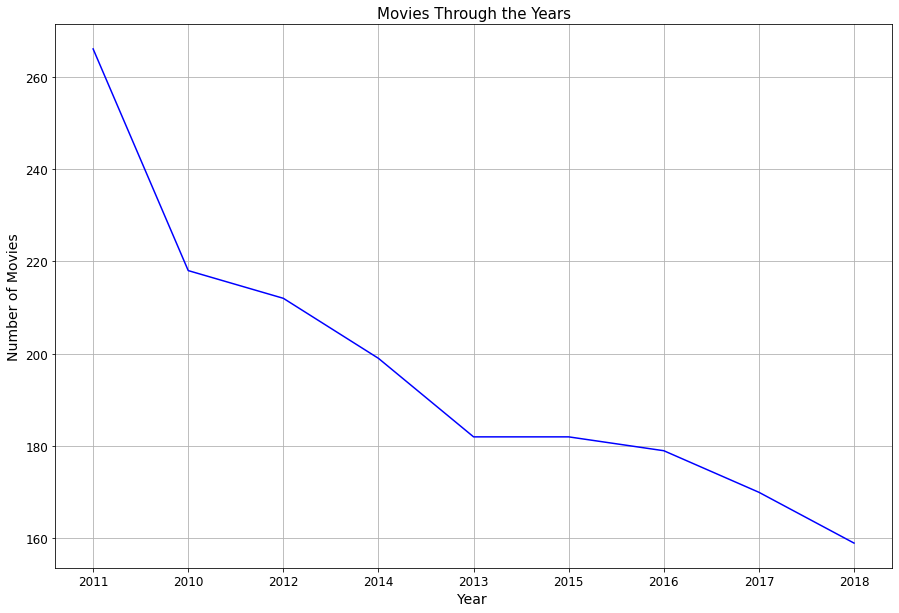

In [30]:
# Movies through the years
movies_years= GB_year.count().sort_values(by='title', ascending=False)

# Create visualization
plt.figure(figsize=(15, 10))
movies_years['title'].plot(kind='line',color='blue' ,fontsize=12)
plt.title('Movies Through the Years',fontsize=15)
plt.xlabel('Year ', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.grid(True)
plt.style.use('seaborn-dark-palette')

<Figure size 720x360 with 0 Axes>

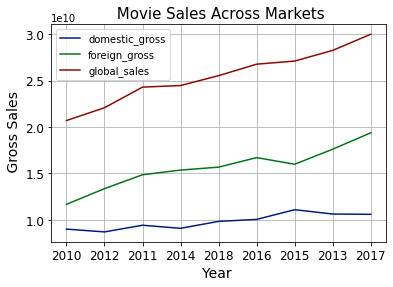

In [31]:
# Movie sales through the years
movies_sales= GB_year.sum().sort_values(by=['global_sales']) 

# Create visualization
plt.figure(figsize=(10, 5))
movies_sales.drop(['runtime_minutes','averagerating'], axis=1).plot(kind='line' ,fontsize=12)
plt.title(' Movie Sales Across Markets',fontsize=15)
plt.xlabel('Year ', fontsize=14)
plt.ylabel(' Gross Sales', fontsize=14)
plt.grid(True)
plt.style.use('ggplot')

# Findings: Market performance through the years

The findings reveal that between 2010 and 2018, there was a decline in the quantity of movies produced.
 Simultaneously, both foreign and global sales experienced significant upward trends, whereas domestic sales showed a moderate increase. This suggests an inverse relationship between the variables during the specified period. 

#  Analysis of Genres
Genre analysis involves grouping genres to examine their relationships with other variables in the dataset, such as average rating, movie length, and sales. By categorizing genres based on these factors, I obtained gainful insights into their interrelationships and their impact on various aspects of the dataset.

There are 260 different genres in the dataset.To  identify the genre that appears most frequently the mode of the 'genres' column in the 'movie_db' dataset is determined 

In [32]:
# There are 260 different genres in the dataset. Identify the genre that appears most frequently. 
movie_db['genres'].mode()

0    Drama
dtype: object

In [33]:
# Groupby genres
GB_genres= movie_db.groupby(['genres'])

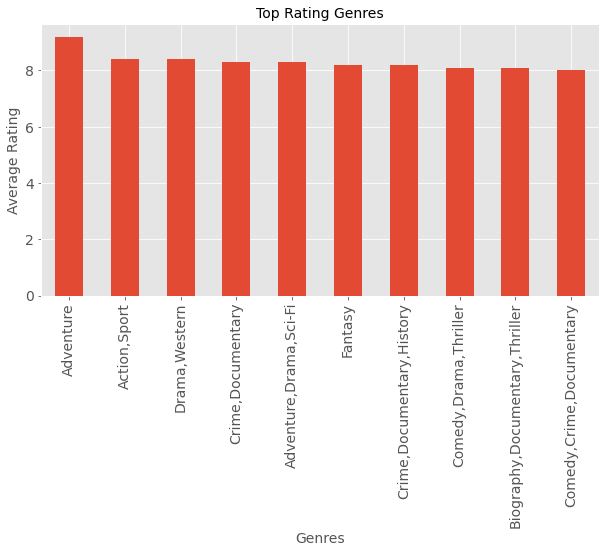

In [34]:
# Top rating genre 
Top_rating= GB_genres.mean().sort_values(by=['averagerating'], ascending = False).head(10)
# Create plot
plt.figure(figsize=(10, 5))
Top_rating['averagerating'].plot(kind='bar' ,fontsize=14 )
plt.title('Top Rating Genres', fontsize=14)
plt.xlabel('Genres',fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.grid(True)
plt.style.use('Solarize_Light2')

## Findings

The analysis revealed the average ratings for each genre group. Notably, genres such as "Adventure", "Action, Sport", and "Drama, Western" emerged as the top-ranking genres with the highest average ratings.

In [35]:
# Market performance categorized by genres .
Top_genre_sales = GB_genres.sum().sort_values(by='global_sales', ascending=False).head(10)
Top_genre_sales

,runtime_minutes,averagerating,domestic_gross,foreign_gross,global_sales
genres,,,,,
"Action,Adventure,Sci-Fi",5987.0,313.2,1.102250e+10,1.661140e+10,2.763390e+10
"Adventure,Animation,Comedy",6799.0,466.1,9.618338e+09,1.796220e+10,2.758054e+10
"Action,Adventure,Fantasy",3655.0,194.9,4.378787e+09,8.936100e+09,1.331489e+10
"Action,Adventure,Comedy",2854.0,163.2,3.170914e+09,6.494200e+09,9.665114e+09
"Action,Adventure,Thriller",1959.0,104.9,1.851100e+09,4.748300e+09,6.599400e+09
"Action,Adventure,Animation",1717.0,126.1,2.168615e+09,4.269500e+09,6.438115e+09
Drama,12015.0,763.6,2.411594e+09,3.099462e+09,5.511056e+09
"Action,Adventure,Drama",3662.0,194.1,1.751412e+09,3.606132e+09,5.357543e+09
Comedy,5535.0,319.2,2.321740e+09,2.449174e+09,4.770914e+09


In [36]:
# Modify dataframe 
Top_genre_sales_lessColumns= Top_genre_sales.drop(['runtime_minutes', 'averagerating'] ,axis=1)

<Figure size 1800x1080 with 0 Axes>

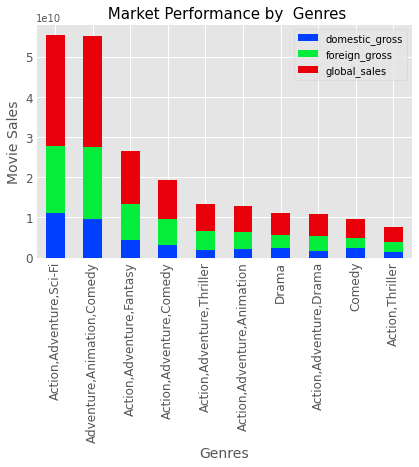

In [66]:
# Create visualization 
plt.figure(figsize=(25, 15))
Top_genre_sales_lessColumns.plot(kind='bar' ,stacked =True, fontsize=12)
plt.title(' Market Performance by  Genres',fontsize=15)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Movie Sales', fontsize=14)
plt.grid(True)
plt.style.use('seaborn-bright')

In [38]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## Findings

Findings reveal that the genres emerged as the top global grossing genres are: 

"Action, Adventure, Sci-Fi", 
"Adventure, Animation, Comedy",
"Action, Adventure, Fantasy" 

### Findings Domestic vs Foreign Sales

Analysis comparing domestic and foreign sales by genre indicates that the top domestic sales were: 

"Action, Adventure, Sci-Fi",
"Adventure, Animation, Comedy",
"Action, Adventure, Fantasy".

Conversely, for foreign sales, the leading genres were:
"Adventure, Animation, Comedy",
"Action, Adventure, Sci-Fi",
"Action, Adventure, Fantasy

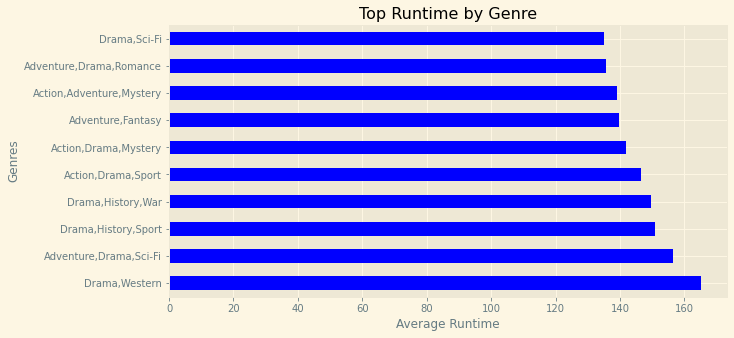

In [39]:
# The duration of movies categorized by genres.
Top_length= GB_genres.mean().sort_values(by=['runtime_minutes'], ascending = False).head(10)
# Create plot
plt.figure(figsize=(10, 5))
Top_length['runtime_minutes'].plot(kind='barh',color='blue' )
plt.title('Top Runtime by Genre')
plt.xlabel('Average Runtime')
plt.ylabel('Genres')
plt.grid(True)
plt.style.use('seaborn-colorblind')

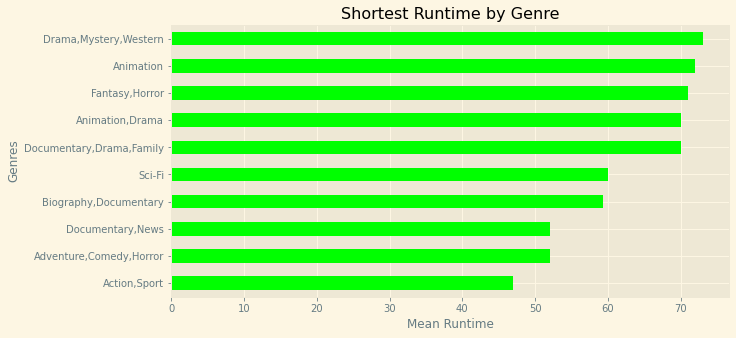

In [40]:
Short_length= GB_genres.mean().sort_values(by=['runtime_minutes'], ascending =True).head(10)
# Create plot
plt.figure(figsize=(10, 5))
Short_length['runtime_minutes'].plot(kind='barh', color='lime')
plt.title('Shortest Runtime by Genre')
plt.xlabel('Mean Runtime')
plt.ylabel('Genres')
plt.grid(True)


## Findings

Determining the mean runtime duration for each category of genres, indicated that the top three genres with the lengthiest average runtimes are 
"Drama, Western," 
"Adventure, Drama, Sci-Fi," and 
"Drama, History, Sports."

Conversely, genres exhibiting the shortest average durations include 
"Action, Sport," 
"Adventure, Comedy, Horror," and
"Documentary, News."

# Examination of Movie Duration (runtime_minutes)
The runtime_minutes variable will be scrutinized to explore the correlation between movie duration and average rating, as well as the relationship between movie duration and sales across various markets.

In [41]:
#Groupby 'runtime_minutes'
GB_runtime= movie_db.groupby(['runtime_minutes'])


In [42]:
Top_length= GB_runtime.mean().sort_values(by=['global_sales'], ascending = False).head(10)
Top_length

,averagerating,domestic_gross,foreign_gross,global_sales
runtime_minutes,,,,
59.0,7.300000,3.565000e+08,5.011000e+08,8.576000e+08
147.0,7.833333,2.631667e+08,4.522000e+08,7.153667e+08
152.0,6.950000,3.113500e+08,3.589000e+08,6.702500e+08
143.0,6.440000,1.965594e+08,4.267000e+08,6.232594e+08
136.0,7.166667,2.298568e+08,3.715157e+08,6.013725e+08
169.0,8.333333,1.637593e+08,4.025229e+08,5.662822e+08
60.0,5.550000,2.497500e+08,2.136500e+08,4.634000e+08
164.0,7.800000,1.840000e+08,2.717000e+08,4.557000e+08
161.0,7.466667,9.213333e+07,3.574333e+08,4.495667e+08


<Figure size 1800x1080 with 0 Axes>

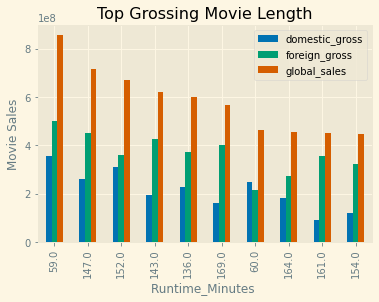

In [43]:
# Movie length market performanace 
# Modify data frame 
Top_length_lessColumns= Top_length.drop([ 'averagerating'] ,axis=1)
# Create visualization 
plt.figure(figsize=(25, 15))
Top_length_lessColumns.plot(kind='bar' )
plt.title('Top Grossing Movie Length')
plt.xlabel('Runtime_Minutes ')
plt.ylabel('Movie Sales')
plt.grid(True)
plt.style.use('seaborn-colorblind')


## Findings 
Among the various movie lengths observed, movies with a runtime of 59 minutes generated the highest  global gross sales $  n8.5B. 

Analysis of movie runtimes across different markets reveals that a runtime of 59 minutes emerged as the top performer, leading

both the domestic market with 3.5B dollars  and the foreign market with 5B dollars. 

Following closely in the domestic market were runtimes of 152 and 149 minutes, while in the foreign markets, they were 147 and 143 minutes.

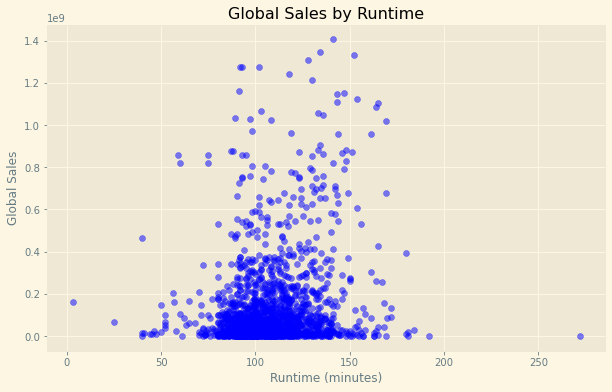

In [44]:
# Visualize the relationship between the movie length  and the  global sales  using scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(movie_db['runtime_minutes'], movie_db['global_sales'], alpha=0.5, color ='blue')
plt.title('Global Sales by Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Global Sales')
plt.show()

## Findings
This scatter plot suggests that movie runtime alone does not directly determine global sales. Other factors seems to be  contributing  to the variation in movie sales. Further analysis is needed to explore additional variables affecting movie revenue generation. 

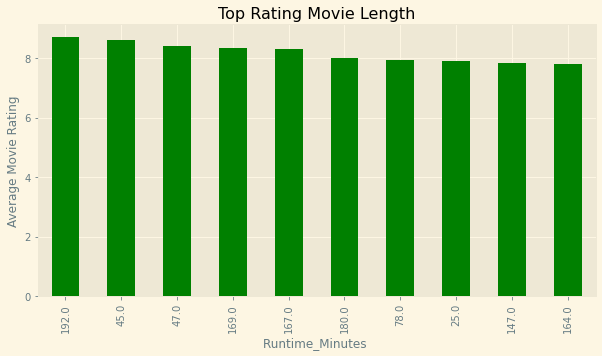

In [45]:
# Top movie length average rating 
Top_rate= GB_runtime.mean().sort_values(by=['averagerating'], ascending = False).head(10)

# Create visualization 
plt.figure(figsize=(10, 5))
Top_rate['averagerating'].plot(kind='bar', color='green' )
plt.title('Top Rating Movie Length')
plt.xlabel('Runtime_Minutes ')
plt.ylabel('Average Movie Rating')
plt.grid(True)
plt.style.use('seaborn-colorblind')

## Findings
Analysis of the average movie length and average showed that movie lenth of 192 enjoyed the highest rating folllowed by 45 and 47 minutes. 

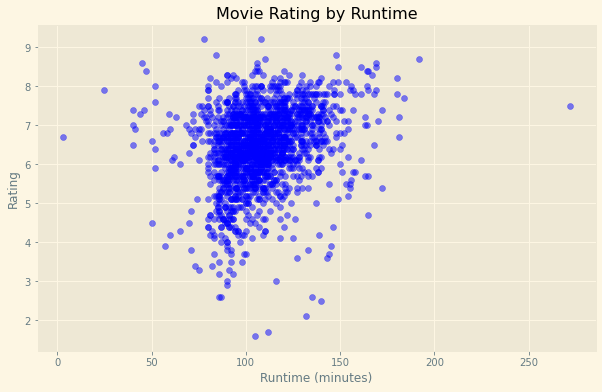

In [46]:
# Visualize the relationship between the movie runtimes and the movie average rating
# Plot a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(movie_db['runtime_minutes'], movie_db['averagerating'], alpha=0.5, color ='blue')
plt.title('Movie Rating by Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Rating')
plt.show()

## Findings
 This scatter plot represents the relationship between movie runtime and average ratings. The concentration around certain runtime values suggests an interesting pattern. Further analysis could reveal insights about optimal movie length for higher ratings. 

In [47]:
# Groupby averagerating
GB_rating= movie_db.groupby(['averagerating'])
Top_rate=GB_rating.mean().sort_values(by=['global_sales'], ascending = False).head(10)

<Figure size 1800x1080 with 0 Axes>

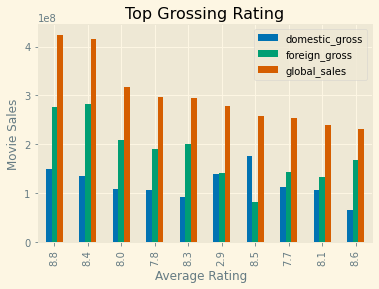

In [48]:
# Movie length market performanace 
# Modify data frame 
Top_rate_lessColumns= Top_rate.drop(['runtime_minutes'] ,axis=1)
# Create visualization 
plt.figure(figsize=(25, 15))
Top_rate_lessColumns.plot(kind='bar' )
plt.title('Top Grossing Rating')
plt.xlabel('Average Rating  ')
plt.ylabel('Movie Sales')
plt.grid(True)
plt.style.use('fivethirtyeight')

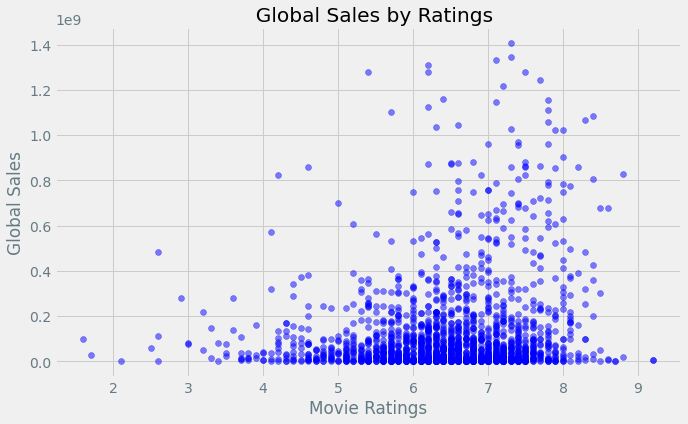

In [49]:
# Visualize the relationship between the movie average rating and the movie sales
# Plot a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(movie_db['averagerating'], movie_db['global_sales'], alpha=0.5, color ='blue')
plt.title('  Global Sales by Ratings')
plt.xlabel('Movie Ratings')
plt.ylabel('Global Sales')
plt.show()

## Findings
This scatter plot represents the relationship between movie ratings and their corresponding global sales. There is a concentration around certain ratings. Further analysis could reveal insights about the impact of ratings on global sales. 

Text(0.5, 1.0, 'Correlation Matrix')

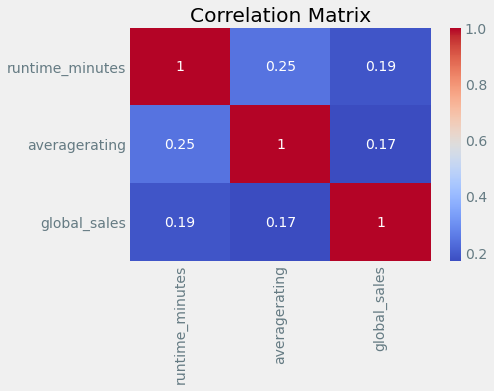

In [50]:
# Correlation Analysis

correlation_matrix = movie_db[['runtime_minutes', 'averagerating', 'global_sales']].corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
ax = plt.gca()
ax.set_title('Correlation Matrix')


## Correlation Analysis:
The correlation coefficient between runtime_minutes’ and ‘averagerating’ is 0.25, between  ‘runtime_minutes’ and ‘global_sales’ is 0.19 and between ‘averagerating’ and ‘global_sales’ is 0.17.
All correlations observed are positive, suggesting that as one variable increases, the other tends to increase as well.
Market correlations are significant; however, their correlation with movie runtime and average rating is notably lower compared to other variables. These correlations can guide decision-making in areas of movie production and marketing

# Additional analysis

Linear regression statistcal modeling will be used to provide better insights by uncovering patterns and relationships
to better inform  business  decision

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import statsmodels.api as sm

# Runtime as a predictor 
 Run a Simple Linear Regression with runtime as the Predictor


In [52]:
#  Linear regression with runtime as the predictor of global sales 
# Determine X and y values(defining the variables)
x = movie_db['runtime_minutes']
y = movie_db['global_sales']

 # Create an OLS model   
x = sm.add_constant(x)
model = sm.OLS(y, x)
result=model.fit()


In [53]:

# Display results summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           global_sales   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     65.31
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           1.18e-15
Time:                        19:44:01   Log-Likelihood:                -36338.
No. Observations:                1767   AIC:                         7.268e+04
Df Residuals:                    1765   BIC:                         7.269e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -8.354e+07   2.68e+07     

## Findings 

 The ordinary least square  regression was used to test if  movie length(runtime_minutes) significantly predicted gross sales.
 
#Coefficients of the model
#The intercept(const ): -8.354e+07 

runtime_minutes  1.976e+06

The fitted regression model was: Global Sales=-8.354e+07+1.976e+06*runtime_minutes

Suggesting that for every additional minute in movie length, global sales are expected to increase by 1.976e+06 units($1,976,000).

The overall regression was statistically significant
R-squared: 0.036, 
Adj. R-squared:0.037 
Approximately 3.6 percent of the variability in global sales can be explained by the length of the movie.

 F-statistic is 65.31,  low p-value,  (Prob (F-statistic):  1.18e-15) suggesting that the regression model is statistically 
 significant. 

Overall, the regression model suggests that there is a statistically significant positive relationship between the runtime of movies and their global sales. However, the low R-squared value indicates that the model explains only a small portion of the variance in gross sales, suggesting that other factors not included in the model may also influence  global sales.

 
 ## OLS with runtime  as the Predictor and domestic sales as dependent variable 

As previous  analysis above indicates, the length of the movie has a realtionship with sales.  Analysis delves further   quantifying the strength of the relationship in the domestic and foreign market. 

In [54]:
# Runtime as the predictor of domestic sales
# Determine X and y values(defining the variables)
x = movie_db['runtime_minutes']
y = movie_db['domestic_gross']
    
x = sm.add_constant(x)

model = sm.OLS(y, x)

#fit linear regression model
result=model.fit()


In [55]:
# Display results summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         domestic_gross   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     44.97
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           2.69e-11
Time:                        19:44:01   Log-Likelihood:                -34662.
No. Observations:                1767   AIC:                         6.933e+04
Df Residuals:                    1765   BIC:                         6.934e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.844e+07   1.04e+07     

## Findings 

 The ordinary least square  regression was used to test if  movie length(runtime_minutes) significantly predicted domestic sales.
Coefficients:
The intercept (const) is  -18,440,000.
runtime_minutes  6.351e+05 
The fitted regression model was:Domestic gross= -18,440,000+6.351e+05*runtime_minutes
The coefficient for the predictor variable runtime_minutes is approximately 635,100. This means that for each additional minute of runtime, the domestic gross is estimated to increase by approximately $635,100.
R-squared:  0.025
Adjusted R-squared: 0.024.
R-squared is 0.025, indicating that approximately 2.5 percent of the variance in domestic gross is explained by the predictor variable (runtime_minutes).
F-statistic: 44.97 and  low probability (p < 0.001)indicating that the overall model is statistically significant.
Overall the regression model suggests that there is a statistically significant positive relationship between the runtime of movies and their domestic gross. However, the R-squared value indicates that the model explains only a small proportion of the variance in domestic gross, suggesting that other factors not included in the model is  influencing domestic gross.



## OLS  with rating  as the independent variable  and global sales as dependent 

In [56]:
# Runtime as the predictor of domestic sales
# Determine X and y values(defining the variables)
x = movie_db['averagerating']
y = movie_db['global_sales']
 # adding the constant term
    
x = sm.add_constant(x)

model = sm.OLS(y, x)

#fit linear regression model
result=model.fit()

In [57]:
# Display results summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           global_sales   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     52.69
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           5.84e-13
Time:                        19:44:01   Log-Likelihood:                -36344.
No. Observations:                1767   AIC:                         7.269e+04
Df Residuals:                    1765   BIC:                         7.270e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.037e+08   3.25e+07     -3.189

## Findings
The ordinary least square  regression was used to test if  movie ratings(averagerating) significantly predicted global sales
Coefficients:
The intercept (const) is  --1.037e+08 
averagerating   3.613e+07
The fitted regression model was:Global sales = -1.037e+08 +3.613e+07*averagerating
The coefficient for the predictor variable averagerating is approximately 36 million dollars . This means that for each additional  unit of average rating  the global sales is estimated to increase by approximately 36M dollars.

R-squared:  0.029
Adjusted R-squared: 0.028.
R-squared is 0.029, indicating that approximately 2.9 percent of the variance in global sales is explained by the predictor variable (averagerating).
F-statistic: 52.69 and  low probability (p < 0.001)indicating that the overall model is statistically significant.

Overall the regression model suggests that there is a statistically significant positive relationship between the  averageratings of movies and their global sales. However, the R-squared value indicates that the model explains only a small proportion of the variance in global sales, suggesting that other factors not included in the model is  influencing global sales.


## OLS  with runtime as the independent variable  and average rating  as dependent 

In [58]:
# Runtime as the predictor of average rating
# Determine X and y values(defining the variables)
x = movie_db['runtime_minutes']
y = movie_db['averagerating']
   
x = sm.add_constant(x)

model = sm.OLS(y, x)

#fit linear regression model
result=model.fit()

In [59]:
# Display results summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          averagerating   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     115.1
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           4.64e-26
Time:                        19:44:01   Log-Likelihood:                -2435.0
No. Observations:                1767   AIC:                             4874.
Df Residuals:                    1765   BIC:                             4885.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.1438      0.125     

## Findings 
The R-squared value, is 0.061. This suggests that approximately 6.1% of the variance in movie ratings can be explained by the independent variable (runtime_minutes).
Coefficients:
The coefficient for the runtime_minutes variable is 0.0122. 
This indicates that, on average, for each additional minute in the runtime of a movie, the average rating is expected to increase by approximately 0.0122 units.
The F-statistic is 115.1 with a very low p-value (4.64e-26), indicating that the overall regression model is statistically significant.

The regression results indicate that there is a statistically significant but modest positive relationship between movie runtime and average rating. The model explains only a small proportion of the variance in movie ratings, suggesting that other factors beyond runtime also influence the average rating of movies.

# Convert categorical genres to numeric for regression analysis

In [60]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Fit label encoder and transform the column to numeric labels
movie_db['numeric_genres'] = label_encoder.fit_transform(movie_db['genres'])

#  'numeric_genres' contains the numeric representation of each category in the DataFrame
movie_db


,title,runtime_minutes,genres,averagerating,domestic_gross,foreign_gross,year,global_sales,numeric_genres
0,On the Road,124.0,"Adventure,Drama,Romance",6.1,744000.0,8000000.0,2012,8744000.0,84
1,On the Road,89.0,Drama,6.0,744000.0,8000000.0,2012,8744000.0,195
2,On the Road,121.0,Drama,5.7,744000.0,8000000.0,2012,8744000.0,195
3,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,58200000.0,129900000.0,2013,188100000.0,69
4,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,26300000.0,26900000.0,2014,53200000.0,33
...,...,...,...,...,...,...,...,...,...
1762,Detective Chinatown 2,121.0,"Action,Comedy,Mystery",6.1,2000000.0,542100000.0,2018,544100000.0,25
1763,Hereditary,127.0,"Drama,Horror,Mystery",7.3,44100000.0,35300000.0,2018,79400000.0,210
1764,Nobody's Fool,110.0,"Comedy,Drama,Romance",4.6,31700000.0,1800000.0,2018,33500000.0,145
1765,How Long Will I Love U,101.0,Romance,6.5,747000.0,82100000.0,2018,82847000.0,254


In [61]:
# Determine X and y values(defining the variables)
x = movie_db['numeric_genres']
y = movie_db['global_sales']
 # adding the constant term
    
x = sm.add_constant(x)

# Create an OLS model

model = sm.OLS(y, x)

#fit linear regression model
result=model.fit()

In [62]:
# Display results summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           global_sales   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     245.5
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           6.61e-52
Time:                        19:44:02   Log-Likelihood:                -36255.
No. Observations:                1767   AIC:                         7.251e+04
Df Residuals:                    1765   BIC:                         7.252e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.505e+08   9.03e+06     27.

## Findings
This OLS regression analysis provides insights into the relationship between the dependent variable, global sales, and the independent variable, numeric_genres. The R-squared value of 0.122 indicates that approximately 12.2% of the variation in global sales can be explained by the variation in numeric_genres.
The F-statistic of 245.5 with a very low p-value (6.61e-52) suggests that the regression model as a whole is statistically significant. This means that at least one independent variable has a nonzero effect on the dependent variable.
Overall, the regression model suggests that there is a statistically significant relationship between the number of genres and global sales. However, the model explains only a small portion of the variation in global sales, and there may be other factors not included in the analysis that influence movie sales. 

No handles with labels found to put in legend.


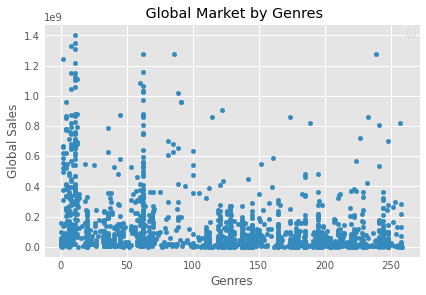

In [63]:
# Visualize the relationship between the genres and the global sales using scatter plots
movie_db.plot(x="numeric_genres", y="global_sales", kind="scatter")
# Add labels and title
plt.xlabel('Genres')
plt.ylabel('Global Sales')
plt.title(' Global Market by Genres')
plt.legend()


# Findings
A clear relationship between genres and sales is not established, further investigation is needed to understand the impact of genre on global sales. Additional factors beyond genre are likely influencing movie sales.

No handles with labels found to put in legend.


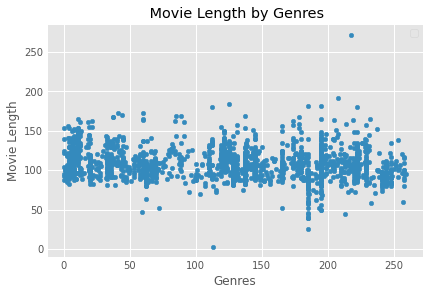

In [64]:
# Visualize the relationship between the genres and the runtime using scatter plots
movie_db.plot(x="numeric_genres", y="runtime_minutes", kind="scatter")
# Add labels and title
plt.xlabel('Genres')
plt.ylabel('Movie Length')
plt.title(' Movie Length by Genres')
plt.legend()

                

# Conclusion 

 1.	Between 2010 and 2018, the quantity of movies produced saw a decline. However, market performance over these years demonstrated significant upward trends in both foreign and global sales, while domestic sales showed a moderate increase. This indicates an inverse relationship between the variables during the specified period.
 2. The genre most frequently observed is "Drama."
 3. Analysis reveals that the top-ranking genres with the highest average ratings are "Adventure", "Action, Sport", and "Drama, Western".
 4. The top global grossing genres are identified as "Action, Adventure, Sci-Fi", "Adventure, Animation, Comedy", and "Action, Adventure, Fantasy".
 5.	A comparison of domestic and foreign sales by genre highlights that the top genres for domestic sales include "Action, Adventure, Sci-Fi", "Adventure, Animation, Comedy", and "Action, Adventure, Fantasy". Conversely, leading genres for foreign sales comprise "Adventure, Animation, Comedy", "Action, Adventure, Sci-Fi", and "Action, Adventure, Fantasy".
 6.	Determining the mean runtime duration for each genre category, it is observed that the top three genres with the lengthiest average runtimes are "Drama, Western", "Adventure, Drama, Sci-Fi", and "Drama, History, Sports". Conversely, genres with the shortest average durations include "Action, Sport", "Adventure, Comedy, Horror", and "Documentary, News".
 7.	Movies with a runtime of 59 minutes generated the highest global gross sales, amounting to 8.5B.
 8. Analysis of movie runtimes across different markets reveals that a runtime of 59 minutes emerged as the top performer, leading both the domestic market with 3.5B dollars and the foreign market with 5B dollars. Following closely in the domestic market were runtimes of 152 and 149 minutes, while in the foreign markets, they were 147 and 143 minutes, respectively.
 9.	Analysis of the average movie length and average rating showed that movies with lengths of 192 minutes enjoyed the highest ratings, followed by those with lengths of 45 and 47 minutes.
 10.	The Ordinary Least Squares (OLS) analysis yielded the following results:
 
 • For movie length and global sales, the R-squared value was 0.036, indicating that approximately 3.6% of the variability in global sales can be explained by movie length.
 
 •	Movie length and domestic sales had an R-squared value of 0.025, suggesting that approximately 2.5% of the variance in domestic gross is explained by movie length.
 
 •	Movie ratings and global sales yielded an R-squared value of 0.029, indicating that approximately 2.9% of the variance in global sales is explained by movie ratings.
 
 •	The R-squared value for movie length and movie ratings was 0.061, suggesting that approximately 6.1% of the variance in movie ratings can be explained by movie length.
 
 •	Genres and global sales had an R-squared value of 0.122, indicating that approximately 12.2% of the variability in global sales can be explained by genres.

All OLS analyses were statistically significant. However, the low R-squared values suggest that the models explains only a small proportion of the variances in the dependent variables, indicating the influence of other factors not included in the model.

